# Import Essential Libraries

In [1]:
import numpy as np
import pandas as pd

# Plotting tools
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


## Import Plotly

In [2]:
# Using plotly.express
import plotly.express as px
import plotly.graph_objects as go

## Natural Language Processing (NLP) Libraries


In [3]:
import re
from pprint import pprint

import csv
import string

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

# spacy for lemmatization
import spacy


### Gensim package

In [4]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models import Word2Vec

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

### pyLDAVis package

In [6]:
!pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=3a19205a119ce9187a19d683501fbc4437486664fe5a5e9580b1a4f19bd9562e
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [7]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


### NLTK Package

In [8]:
# NLTK Stop words
import nltk
nltk.download("stopwords")
# nltk.download()

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

from nltk import ngrams
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer 

/usr/local/lib/python3.7/dist-packages/nltk/decorators.py:70: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  formatvalue=lambda value: "")[1:-1]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Mount Google Drive

In [9]:
import os

# mount drive
from google.colab import drive
drive.mount('/content/drive')


# edit this path if needed
my_path = '/content/drive/My Drive/Colab Notebooks/'
# my_path = '/content/drive/My Drive/NLP Code/'

# change to this path
os.chdir(my_path)

# verify present working directory. It should be identical to 'my_path'
!pwd

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks


# Import Text Data

In [10]:
df = pd.read_csv('data/news_articles.csv', encoding='latin-1')
display(df.head())
display(df.tail())

Article      Date  \
0  KARACHI: The Sindh government has decided to b...  1/1/2015   
1  HONG KONG: Asian markets started 2015 on an up...  1/2/2015   
2  HONG KONG:  Hong Kong shares opened 0.66 perce...  1/5/2015   
3  HONG KONG: Asian markets tumbled Tuesday follo...  1/6/2015   
4  NEW YORK: US oil prices Monday slipped below $...  1/6/2015   

                                             Heading  NewsType  
0  sindh govt decides to cut public transport far...  business  
1                    asia stocks up in new year trad  business  
2           hong kong stocks open 0.66 percent lower  business  
3             asian stocks sink euro near nine year   business  
4                 us oil prices slip below 50 a barr  business

Article       Date  \
2687  strong>DUBAI: Dubai International Airport and ...  3/25/2017   
2688  strong>BEIJING: Former Prime Minister, Shaukat...  3/26/2017   
2689  strong>WASHINGTON: Uber has grounded its fleet...  3/26/2017   
2690  strong>BEIJING: The New Development Bank plans...  3/27/2017   
2691  strong>KARACHI: Karachi-based technology incub...  3/27/2017   

                                                Heading  NewsType  
2687    Laptop ban hits Dubai for 11m weekend traveller  business  
2688  Pak China relations not against any third coun...  business  
2689         Uber grounds self driving cars after accid  business  
2690  New Development Bank plans joint investments i...  business  
2691  Google powered Startup Weekend energizing prou...  business

# Tokenize: Parse each sentence to words/terms/tokens

In [11]:
df['token'] = df['Article'].apply (lambda x: gensim.utils.simple_preprocess(str(x), deacc=True))
display(df.head())

Article      Date  \
0  KARACHI: The Sindh government has decided to b...  1/1/2015   
1  HONG KONG: Asian markets started 2015 on an up...  1/2/2015   
2  HONG KONG:  Hong Kong shares opened 0.66 perce...  1/5/2015   
3  HONG KONG: Asian markets tumbled Tuesday follo...  1/6/2015   
4  NEW YORK: US oil prices Monday slipped below $...  1/6/2015   

                                             Heading  NewsType  \
0  sindh govt decides to cut public transport far...  business   
1                    asia stocks up in new year trad  business   
2           hong kong stocks open 0.66 percent lower  business   
3             asian stocks sink euro near nine year   business   
4                 us oil prices slip below 50 a barr  business   

                                               token  
0  [karachi, the, sindh, government, has, decided...  
1  [hong, kong, asian, markets, started, on, an, ...  
2  [hong, kong, hong, kong, shares, opened, perce...  
3  [hong, kong, asian, markets, tumbled, tuesday,...  
4  [new, york, us, oil, prices, monday, slipped, ...

# Creating Corpus and Vocubulary

In [12]:
# Create Dictionary
id2word = corpora.Dictionary(df['token'])

# Create Corpus
texts = df['token']

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
# print(corpus[:1])
# id2word[0]

# Making Word2Vec Model

## Training word2vec model

In [13]:
w2vmodel = Word2Vec(texts, size=16, window=5, min_count=5, workers=4)

# (i) Visualize a word2vec model based on the "Article" column with t-SNE

In [14]:
from sklearn.manifold import TSNE

def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model   = TSNE(perplexity=50, n_components=2, n_iter=2500, random_state=0)
    reduced_dims = tsne_model.fit_transform(tokens)

    # get the cooridinates
    x = reduced_dims[:, 0]
    y = reduced_dims[:, 1]
    
    # note that animation_group should exist in all frames
    fig = px.scatter(
      # data_frame = df_country, 
      x= x,       
      y=y,        
      hover_name=labels,
      # log_x=True, 
      #size_max=55, 
      text = labels,
      #range_x=[-50, 50], 
      #range_y=[-50,50],
      width = 1000,
      height = 1000,
      title= "t-SNE visualization of words", 
    )

    fig.update_traces(textposition='top center')

    fig.show()
tsne_plot(w2vmodel)
# pass

串流輸出內容已截斷至最後 5000 行。
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__

# (iii)Identify 5-word pairs that are close to each other 
I found out tennis, monetary, club, icc and football are close 
to each other, and this result really make sense.
Monetary always is the most important factor among all sports
icc's whole name is International Cricket Council which deal with 
sport contest and also has strong relation with tennis.
We always mention club when talking about tennis.
Football is also a kind of sport, therefore has connection to tennis.

Also, I have run the function below to find if the result make sense,
and finally it showed that these 5 words do actually have strong connection.


In [15]:
w2vmodel.most_similar('tennis')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning:

Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).

/usr/local/lib/python3.7/dist-packages/gensim/matutils.py:737: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



[('federation', 0.9278765320777893),
 ('council', 0.9205634593963623),
 ('governing', 0.9129552841186523),
 ('bureau', 0.9104393720626831),
 ('richest', 0.9048796892166138),
 ('monetary', 0.9039080142974854),
 ('wada', 0.900392472743988),
 ('supervisory', 0.8999425172805786),
 ('gao', 0.8988869190216064),
 ('programme', 0.8986057043075562)]

# (ii) Word cloud based on the "Article" column

(-0.5, 1599.5, 799.5, -0.5)

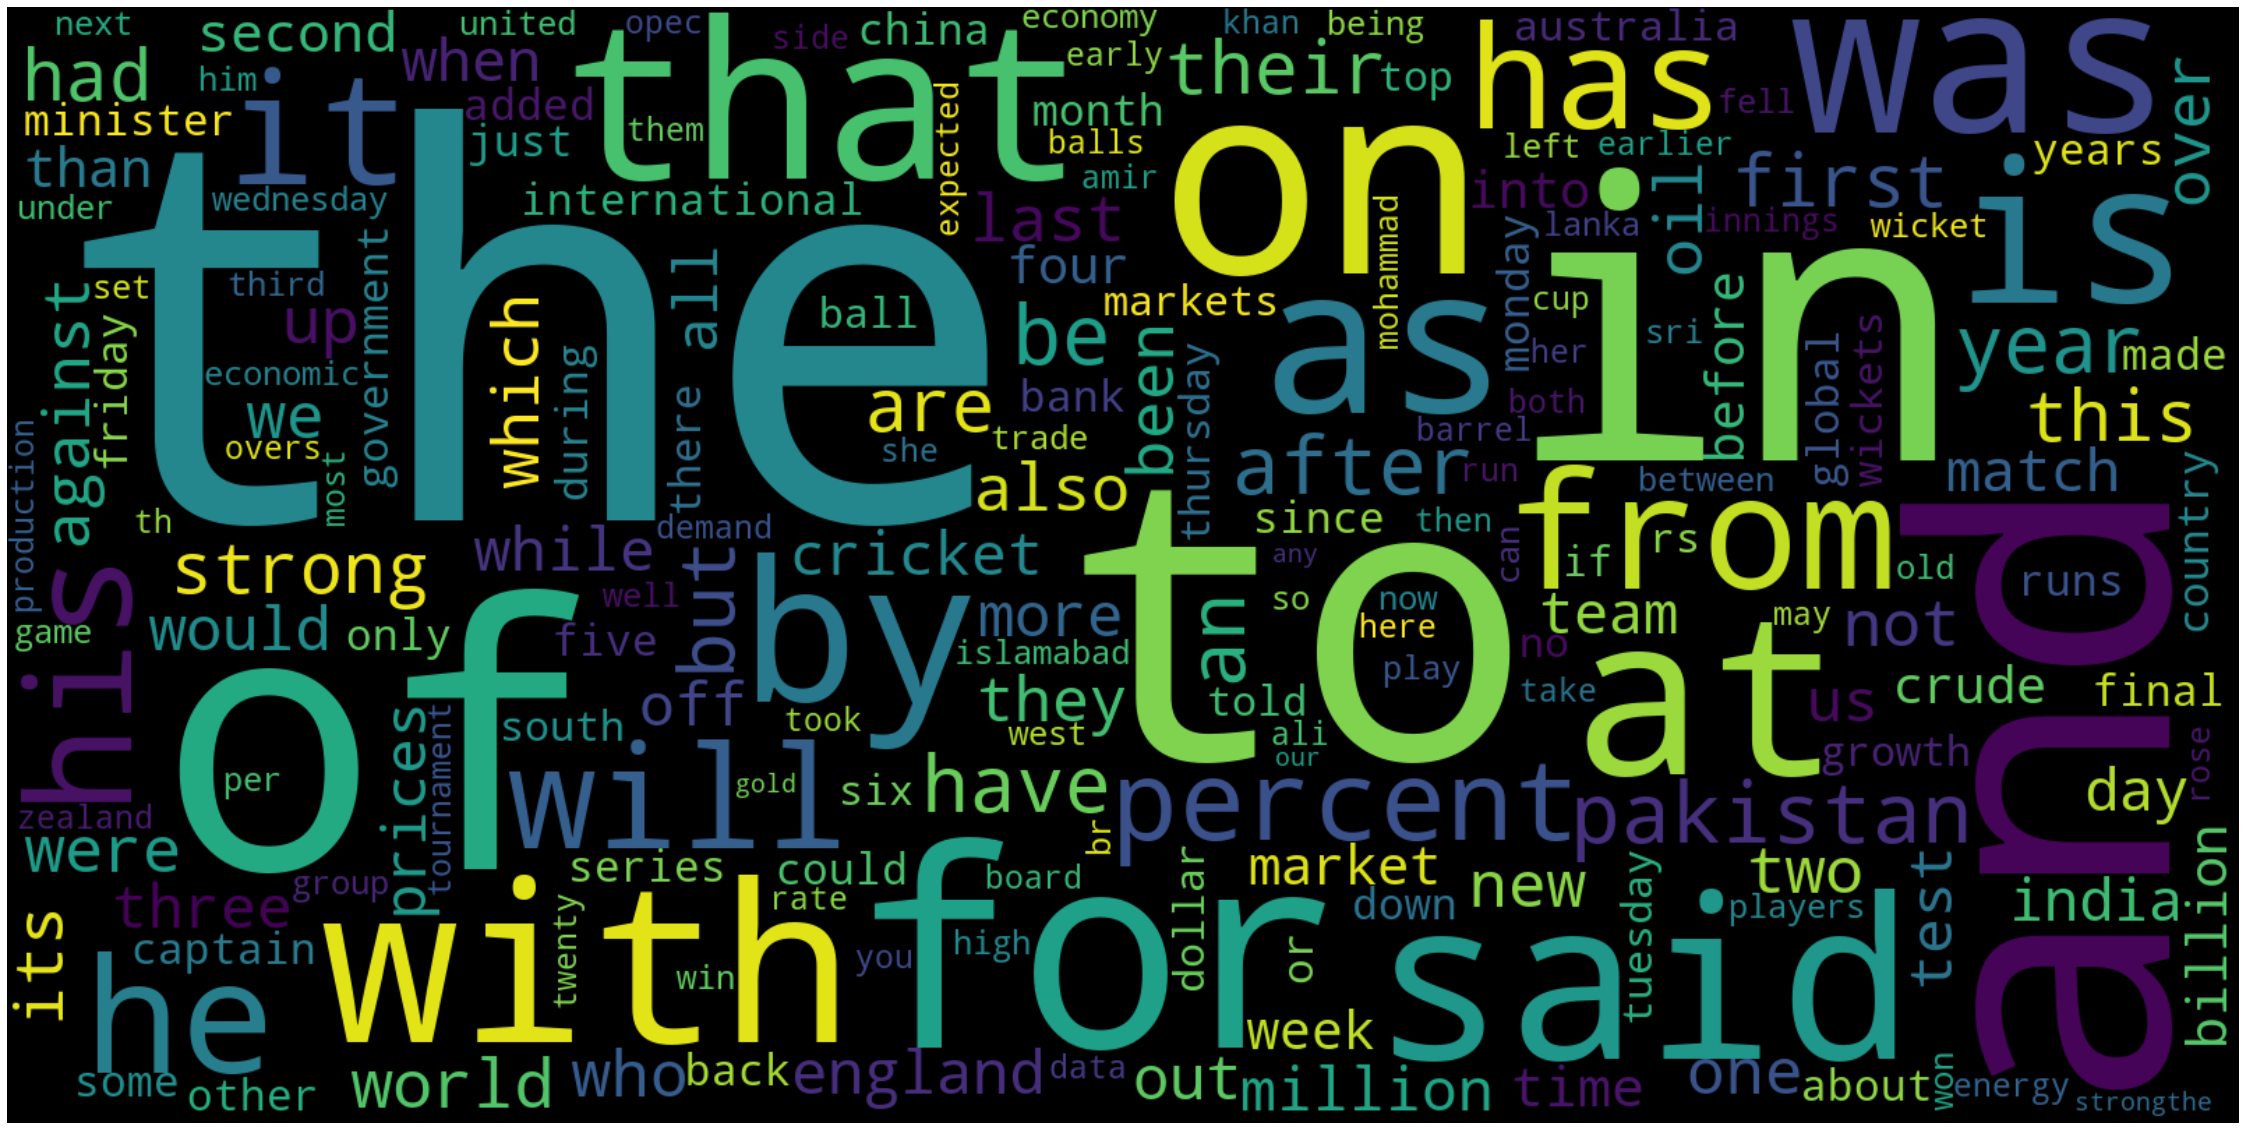

In [19]:
from wordcloud import WordCloud, STOPWORDS
from collections import Counter

words = df.token.sum()
word_freq = Counter(words)


wordcloud = WordCloud(width=1600, height=800)


wordcloud.generate_from_frequencies(frequencies=word_freq)

mpl.rcParams['figure.figsize']=(40.0,30.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=3000             #72 
mpl.rcParams['figure.subplot.bottom']=.1 

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# (iiii) Remove the stop words to reduce noises. Briefly describe what we can learn about the corpus from this word cloud.
From the word cloud I built, I can simply know which words are the most used, and stopwords (a, and, the, etc.) have been automatically removed. From my result, it is obviously that words 'say', 'strong', 'year' are quite big which
mean they are most frequently used in this news_articles file, which is so
reasonable, especially this file is about article. 

串流輸出內容已截斷至最後 5000 行。
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning:

SelectableGroups dict interface is deprecated. Use select.

/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning:

SelectableGroups dict interface is deprecated. Use select.

/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning:

SelectableGroups dict interface is deprecated. Use select.

/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning:

SelectableGroups dict interface is deprecated. Use select.

/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning:

SelectableGroups dict interface is deprecated. Use select.

/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning:

SelectableGroups dict interface is deprecated. Use select.

/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning:

SelectableGroups dict interface is deprecated. Use select.

/usr/local/li

(-0.5, 1599.5, 799.5, -0.5)

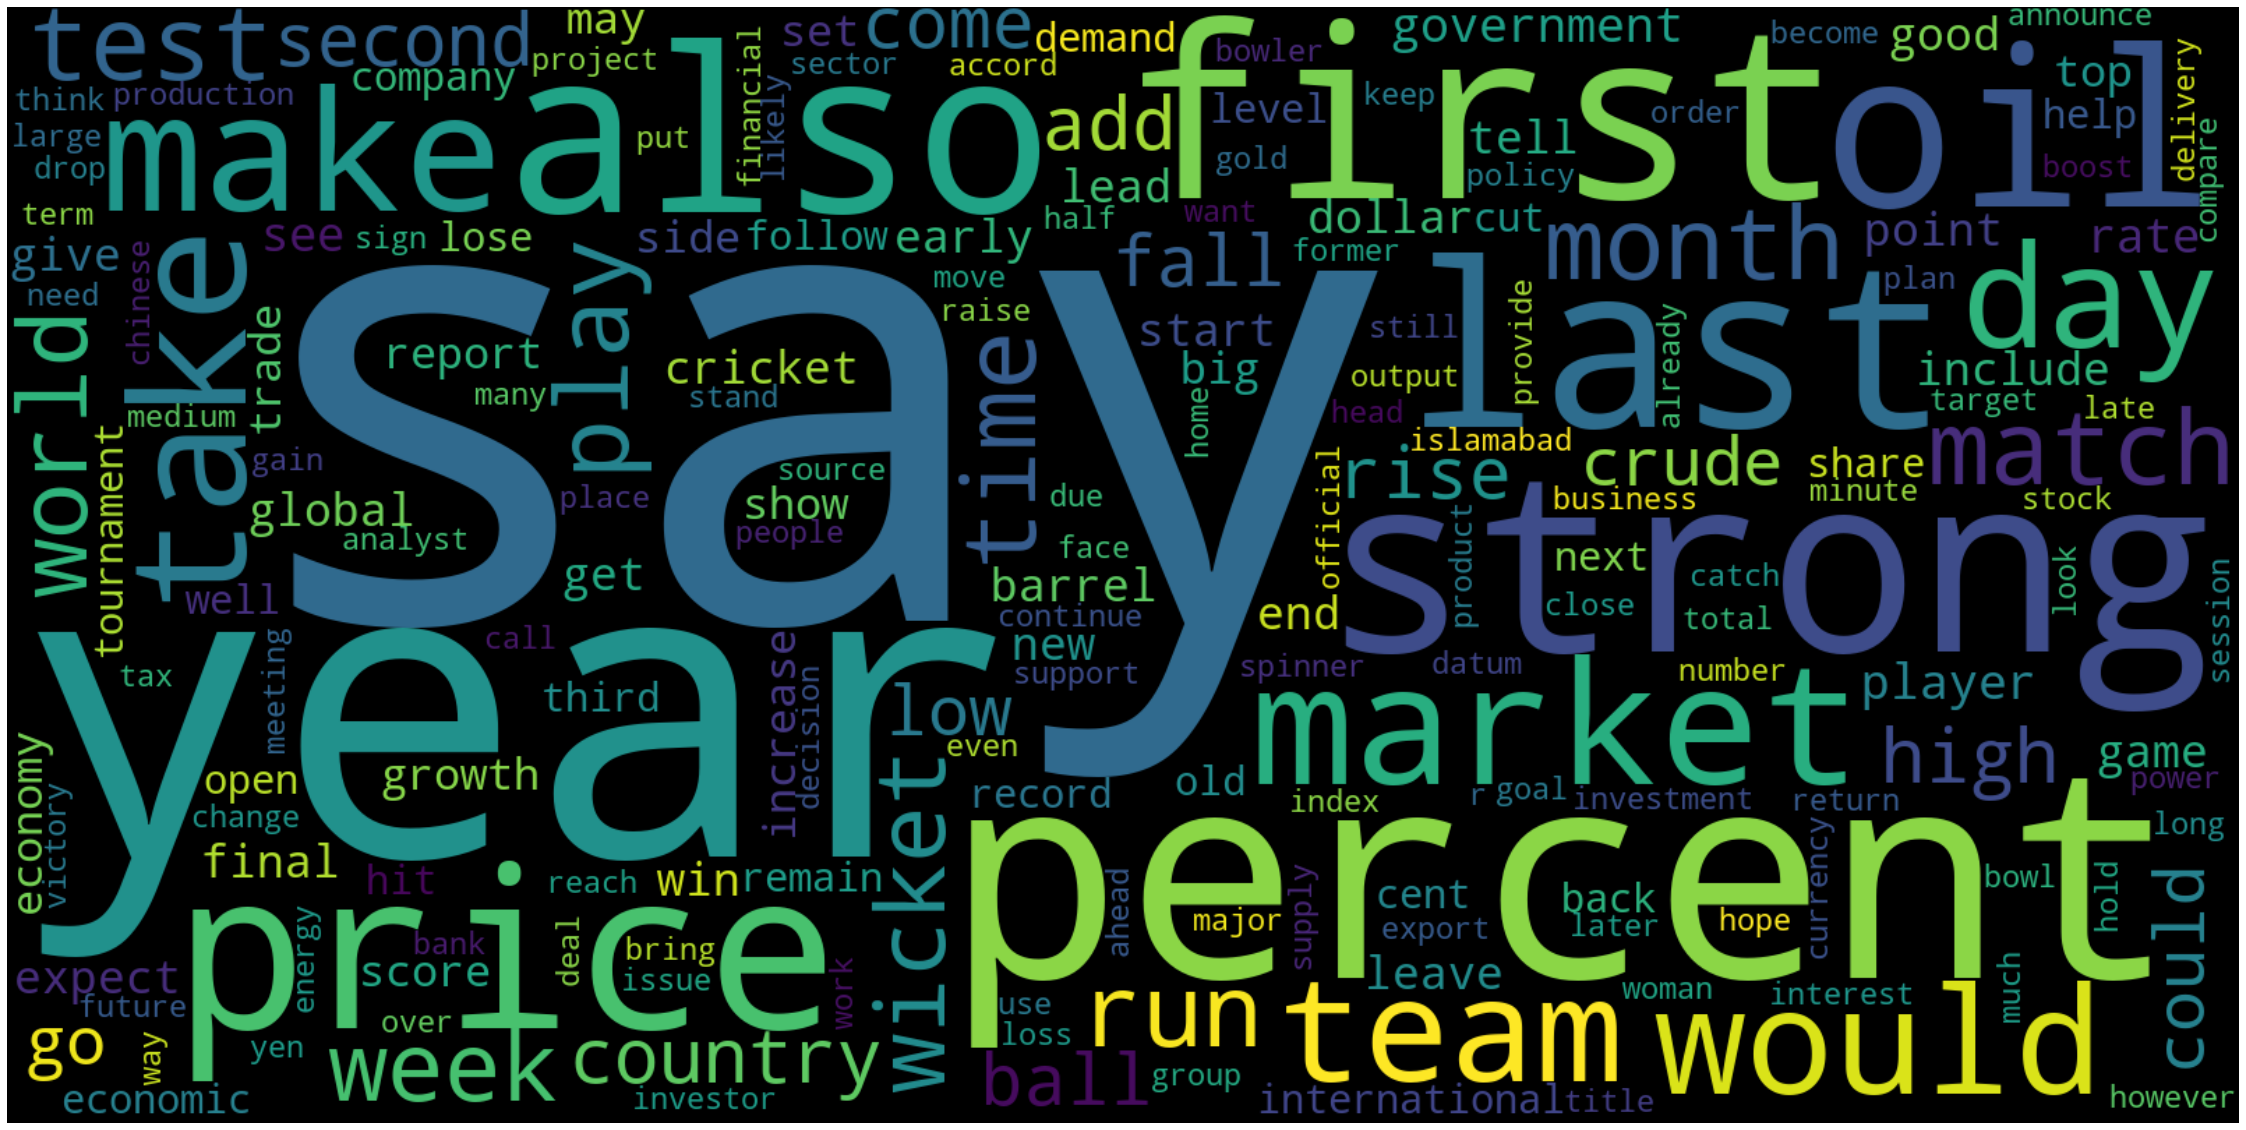

In [20]:
from collections import Counter
from wordcloud import WordCloud, STOPWORDS

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    nlp = spacy.load('en', disable=['parser', 'ner'])
    
    # allowed_list = ['jaws']
    """https://spacy.io/api/annotation"""
    
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
        #texts_out.append([token for token in doc if token.pos_ in allowed_postags])
    return texts_out

df_ = df[['Article']]

df_['token'] = df_['Article'].apply (lambda x: gensim.utils.simple_preprocess(str(x), deacc=True))

# Remove Stop Words
df_['token'] = remove_stopwords(df_['token'])

# Form Bigrams
# df['token'] = make_bigrams(df['token'])

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en


# Do lemmatization keeping only noun, adj, vb, adv
df_['token'] = lemmatization(df_['token'], allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])


words = df_.token.sum()
word_freq = Counter(words)


wordcloud = WordCloud(width=1600, height=800)


wordcloud.generate_from_frequencies(frequencies=word_freq)

mpl.rcParams['figure.figsize']=(40.0,30.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=3000             #72 
mpl.rcParams['figure.subplot.bottom']=.1 

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

